In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

pd.options.display.max_rows = None

weather_df = pd.read_csv('../../data/processed_data/weather_charts_processed.csv')
music_df = pd.read_csv('../../data/processed_data/spotify_2025_daily_charts.csv')
music_df2 = pd.read_csv('../../data/processed_data/daily_charts_analyze.csv')

from sklearn.preprocessing import MinMaxScaler

# 1. 0~1 사이로 밝기 데이터 압축
scaler = MinMaxScaler()
music_df2['mean_centroid'] = scaler.fit_transform(music_df2[['mean_centroid']])

# csv 합침
merged_df = pd.merge(music_df, music_df2, on=['artist_names', 'track_name'], how='inner')

weather_df['date'] = pd.to_datetime(weather_df['date'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

merged_df = merged_df[merged_df['mean_centroid']>=0.45]

music_df_bright = merged_df.groupby('date')['mean_centroid'].count().reset_index()
print(music_df_bright.describe())

                      date  mean_centroid
count                  365     365.000000
mean   2025-07-02 00:00:00      40.120548
min    2025-01-01 00:00:00      30.000000
25%    2025-04-02 00:00:00      36.000000
50%    2025-07-02 00:00:00      39.000000
75%    2025-10-01 00:00:00      43.000000
max    2025-12-31 00:00:00      54.000000
std                    NaN       4.849577


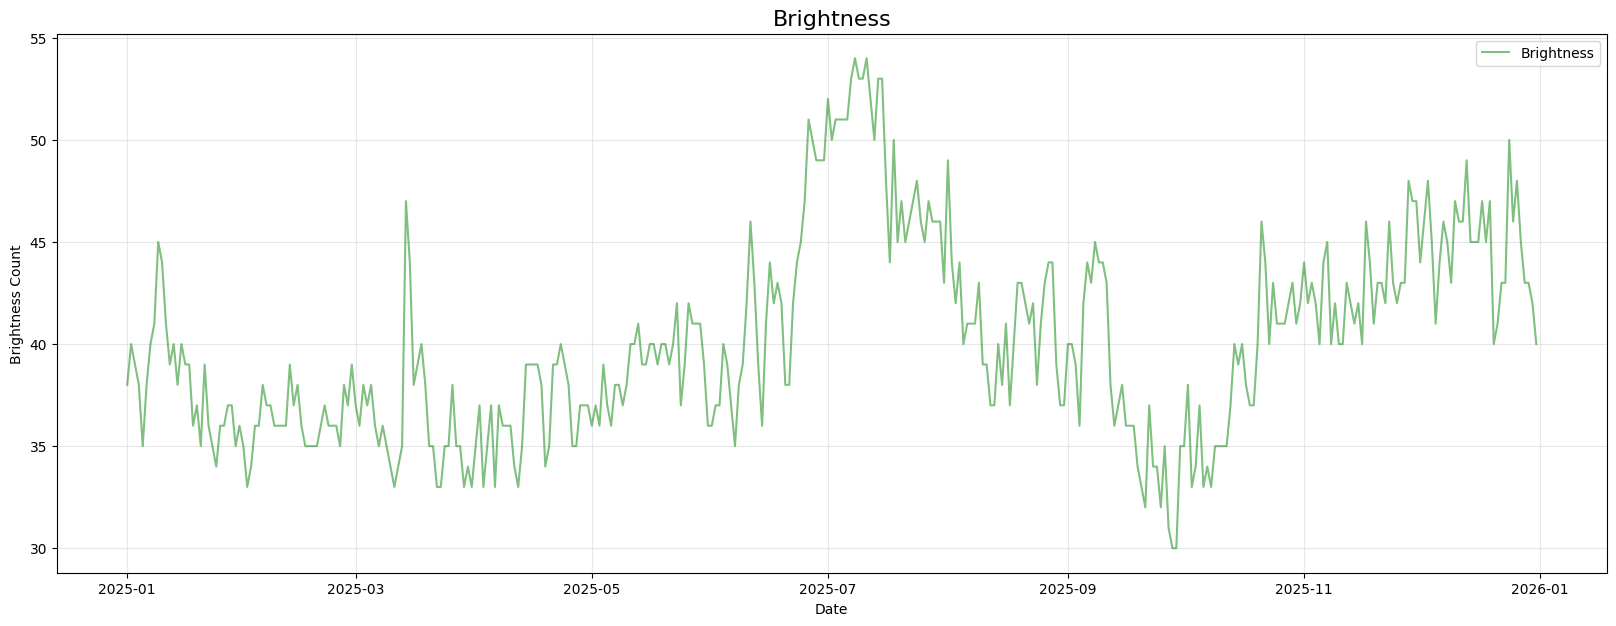

In [14]:
# 2. 시각화 설정
plt.figure(figsize=(20, 7))

# 배경: 전체 데이터의 밝기 흐름 (연한 회색 선)
plt.plot(weather_df['date'], music_df_bright['mean_centroid'], color='green', alpha=0.5, label='Brightness')

# 강조: 맑은 날 (weather == 0) 데이터만 추출해서 강조
#plt.scatter(music_df_bright['date'], music_df_bright['mean_centroid'],label='Sunny Day (0)', edgecolor='black')

# 4. 마무리 스타일링
plt.title('Brightness', fontsize=16)
plt.legend(loc='upper right')
plt.grid(axis='x', alpha=0.3)
plt.grid(axis='y', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Brightness Count')


plt.show()